# Sentiment Analysis

## Building a Sentiment Classifier using Scikit-Learn

Sentiment analysis, an important area in Natural Language Processing, is the process of automatically detecting affective states of text. 
Sentiment analysis is widely applied to voice-of-customer materials such as product reviews in online shopping websites like Amazon, movie reviews or social media. 
It can be just a basic task of classifying the polarity of a text as being positive/negative or it can go beyond polarity, looking at emotional states such as "happy", "angry", etc.

Here we will build a classifier of tweets during the **taiwan-china conflict**
The task is to predict whether a tweet contains positive, negative, or neutral sentiment **about the conflict**. 
This is a typical supervised learning task where given a text string, we have to categorize the text string into predefined categories.

In [7]:
# Importing Required Libraries to Understand Data
import warnings
warnings.filterwarnings('ignore')
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from pprint import pprint
import string


import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [8]:
#data loader class

class DataLoader:
  def __init__(self,dir_name,file_name):
    self.dir_name=dir_name
    self.file_name = file_name
    
 
  def read_csv(self):
    os.chdir(self.dir_name)
    tweets_df=pd.read_csv(self.file_name)
    return tweets_df

In [9]:
# Read the Data

DataLoader_obj = DataLoader('TwitterDataAnalysis/..','processed_tweet_data.csv')

In [10]:
tweets_df=DataLoader_obj.read_csv()

In [11]:
len(tweets_df)

22000

In [12]:
tweets_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,0,2,i_ameztoy,20497,2621,NaN,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",NaN
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,0,201,ZIisq,65,272,NaN,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",NaN
2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,0,0,Fin21Free,85,392,NaN,"[{'text': 'XiJinping', 'indices': [127, 137]}]","[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands
3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,0,0,Fin21Free,85,392,NaN,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands
4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,0,381,VizziniDolores,910,2608,NaN,[],"[{'screen_name': 'ChinaUncensored', 'name': 'C...","Ayent, Schweiz"


### Basic EDA

In [13]:
# plot params
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 


<AxesSubplot:ylabel='subjectivity'>

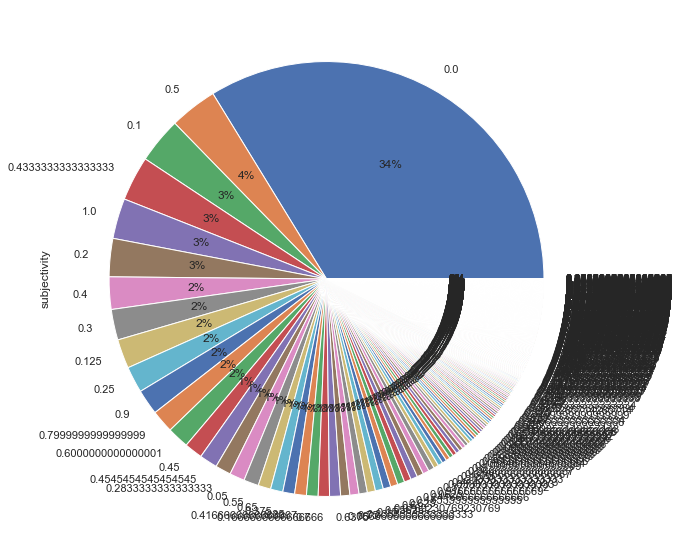

In [16]:
# number of tweets for each subjectivity value
sns.set(rc={'figure.figsize':(14,10)})
tweets_df.subjectivity.value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:ylabel='polarity'>

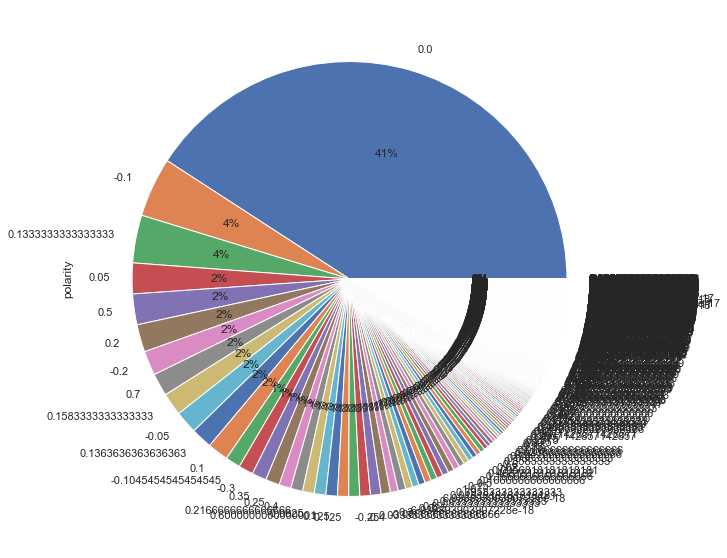

In [20]:
# number of tweets for each polarity
sns.set(rc={'figure.figsize':(14,10)})
tweets_df.polarity.value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:ylabel='place'>

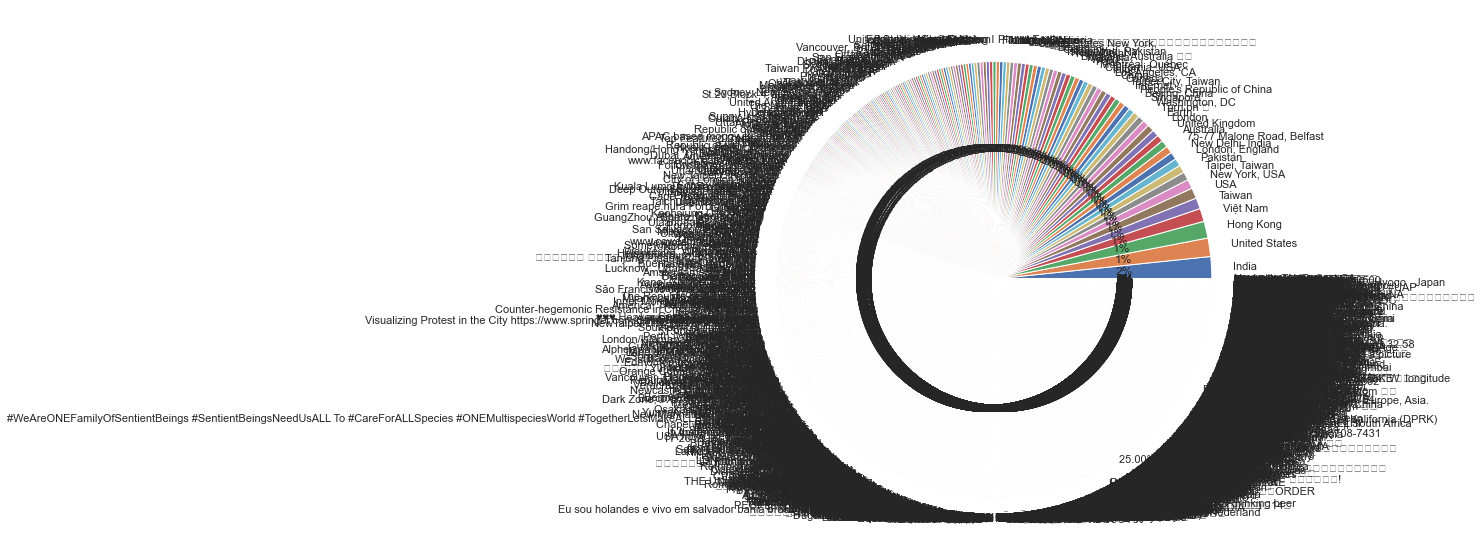

In [21]:
# number of tweets for each place
sns.set(rc={'figure.figsize':(14,10)})
tweets_df.place.value_counts().plot(kind='pie', autopct='%1.0f%%')

This shows that of more of the tweets taken were from India, USA, Hong Kong and Vietnam

<AxesSubplot:ylabel='possibly_sensitive'>

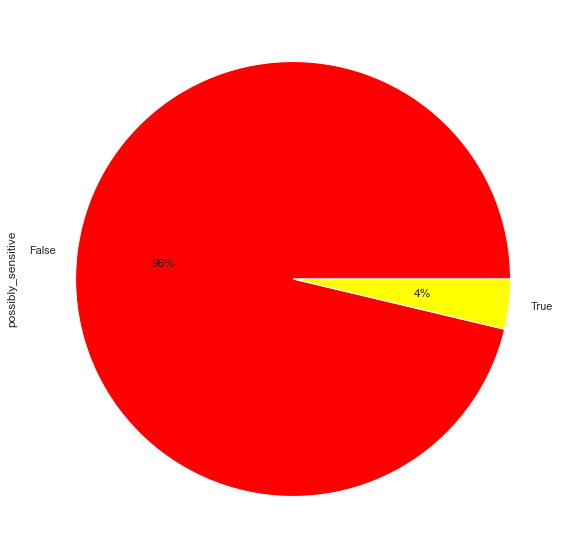

In [29]:
# Distribution of sentiment sensitivity across all the tweets.

sns.set(rc={'figure.figsize':(14,10)})
tweets_df.possibly_sensitive.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [30]:
# A bar plot of subjectivity and polarity by place

sns.set(rc={'figure.figsize':(12,8)})
sentiment = tweets_df.groupby(['subjectivity', 'polarity']).place.count().unstack()
sentiment.plot(kind='bar')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001C14C768700> (for post_execute):


KeyboardInterrupt: 